In [1]:
# Test migration history reconstruction on breast cancer data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'src/data/msk_met/msk_met_freq_one_met_patients.csv')
                          
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = data_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
#     weights = vertex_labeling.Weights(data_fit=0.1, mig=10.0, comig=5.0, seed_site=1.0, reg=0.8, gen_dist=0.0)

#     vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
#                                                 weights=weights, p=r, node_idx_to_label=idx_to_label, 
#                                                 max_iter=150, batch_size=64,
#                                                 custom_colors=custom_colors, primary="breast", show_top_trees=False)
    
    O = data_util.get_organotropism_matrix(unique_sites, HOAD_MSK_MET_MAP, MSK_MET_FN)
    print("O", O)
    weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0, organotrop=0.5)
    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                O=O, weights=weights, p=r, node_idx_to_label=idx_to_label,
                                                batch_size=32, init_temp=30, final_temp=0.01, max_iter=300,
                                                custom_colors=custom_colors, primary="breast", show_top_trees=True, 
                                                visualize_intermediates=True, verbose=True)


        

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3571e-02],
        [-1.0000e+00, -1.0000e+00,  8.4034e-03,  3.6134e-01,  3.3613e-02,
          5.0420e-02],
        [-1.0000e+00,  9.3812e-02,  9.9800e-04,  2.0958e-02,  1.5369e-01,
          1.0379e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e

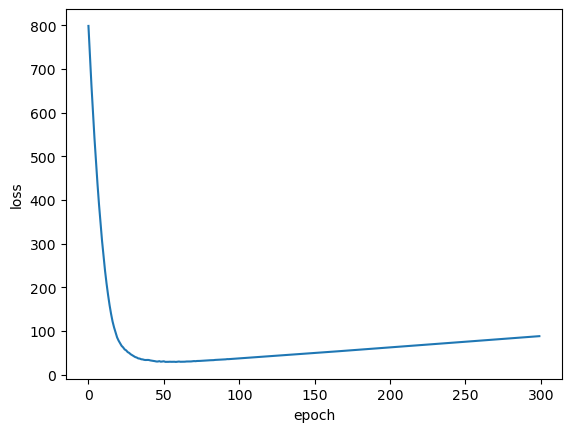

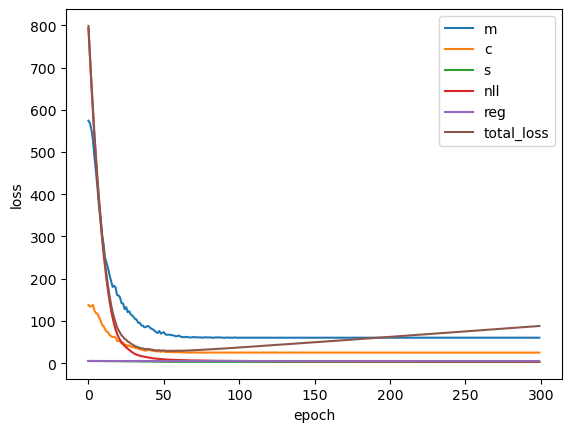

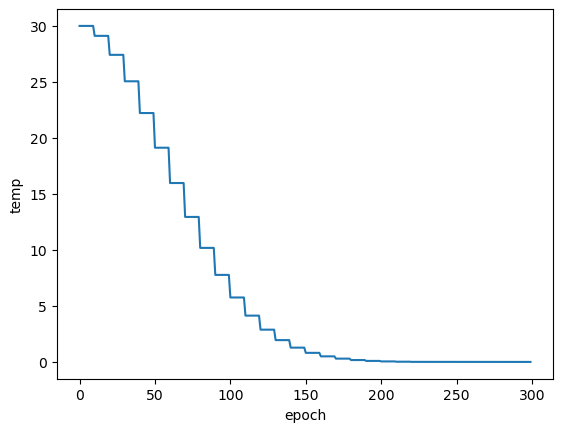

Time elapsed: 14.30406
****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.621
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.00

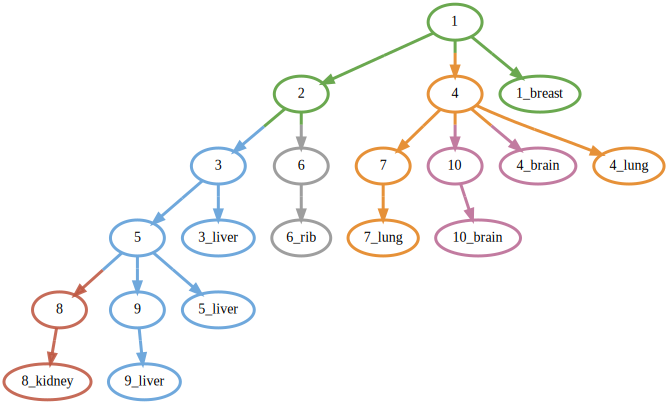

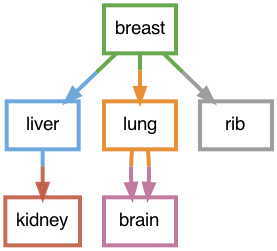

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.637
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3

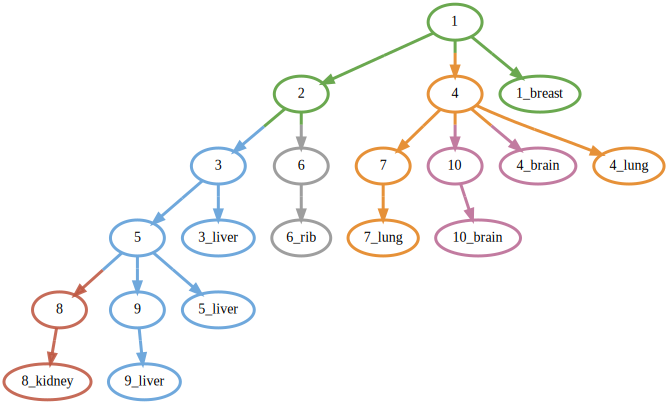

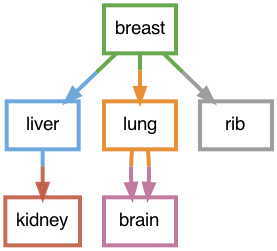

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.655
Reg: 6.000000476837158
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000

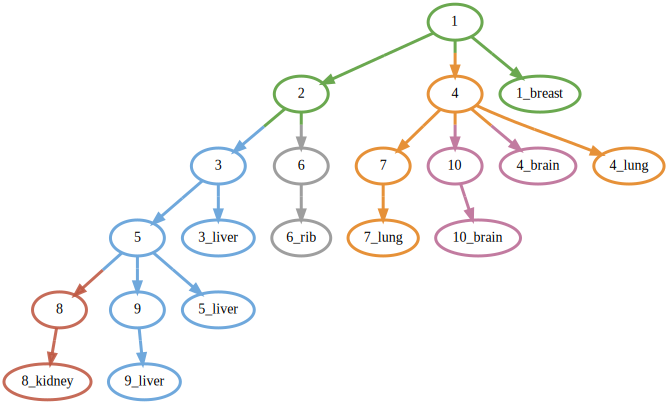

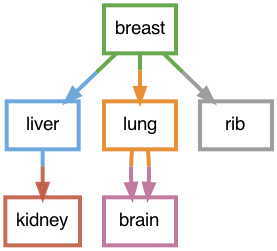

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.663
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

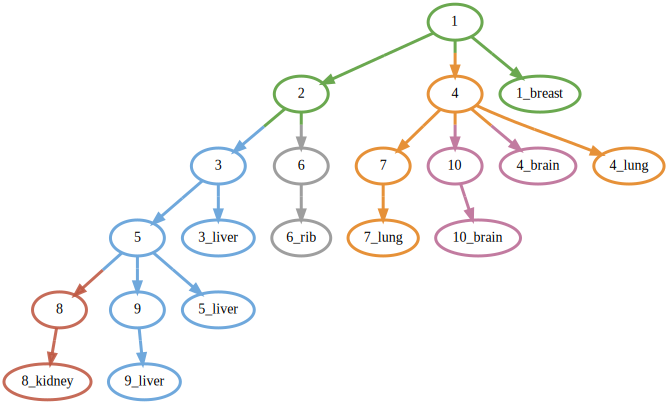

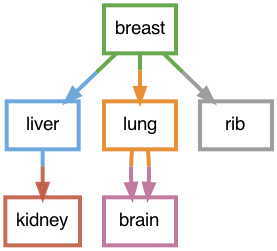

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.672
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

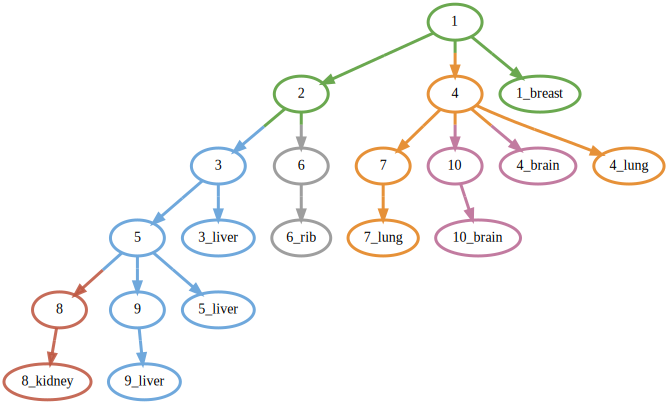

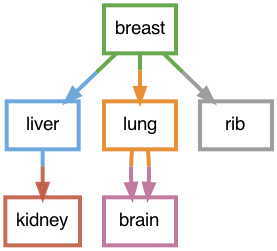

----------------------------------------------------------------------------------------------------



In [15]:
# Patient A7, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3571e-02],
        [-1.0000e+00, -1.0000e+00,  8.4034e-03,  3.6134e-01,  3.3613e-02,
          5.0420e-02],
        [-1.0000e+00,  9.3812e-02,  9.9800e-04,  2.0958e-02,  1.5369e-01,
          1.0379e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e

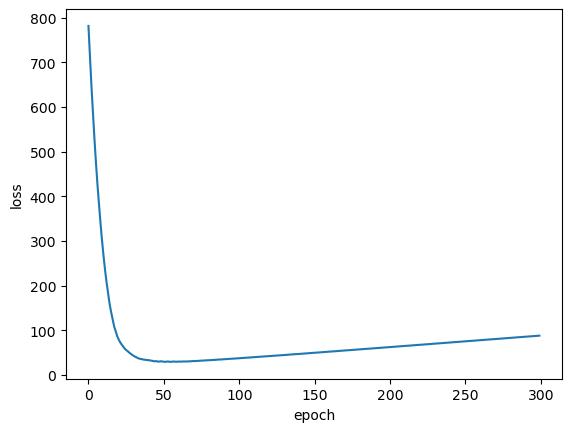

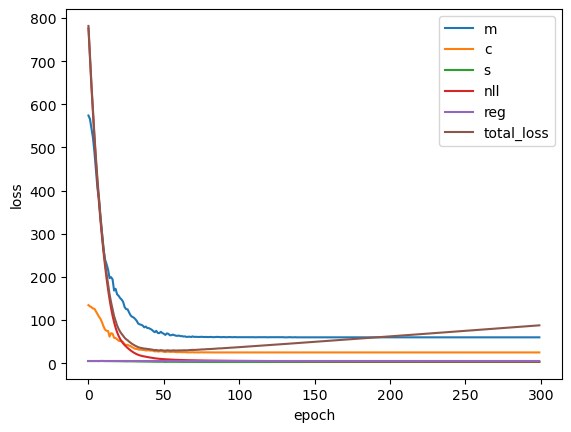

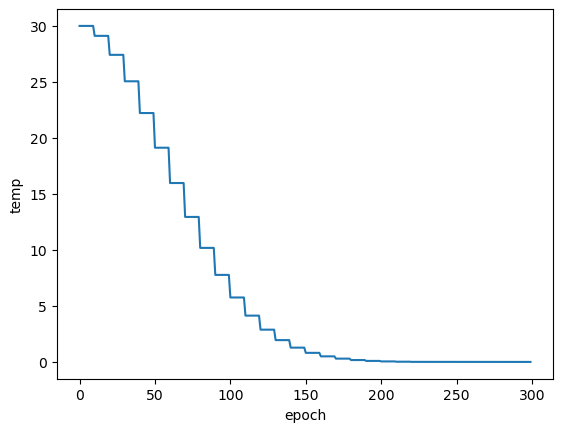

Time elapsed: 14.424011
****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.904
Reg: 6.0
Organotropism penalty: 0.701
site_adj_no_diag
 tensor([[0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.00

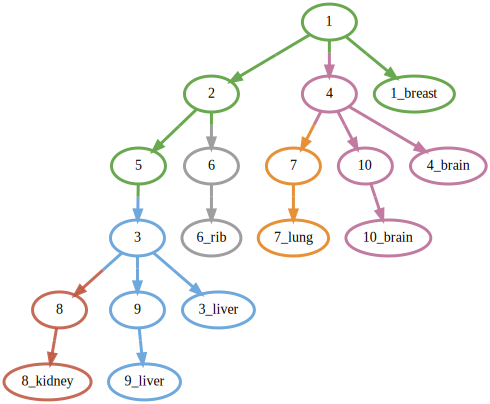

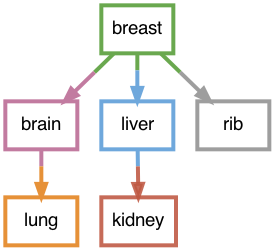

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.855
Reg: 6.000000953674316
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,

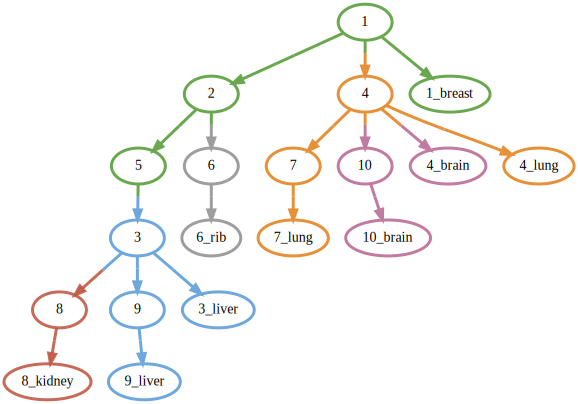

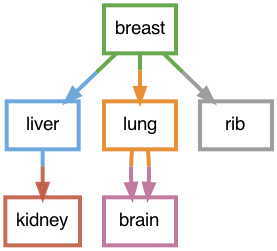

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.911
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

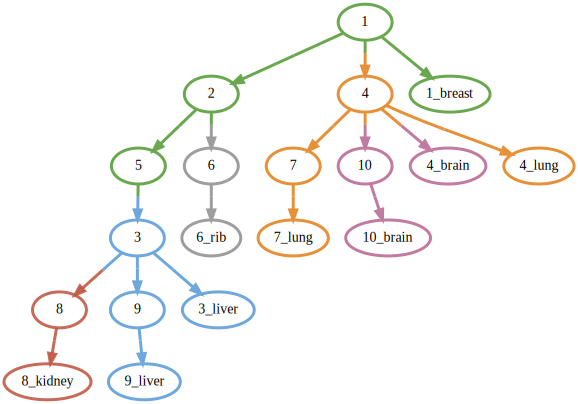

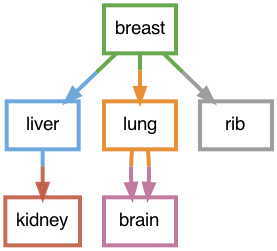

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.917
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

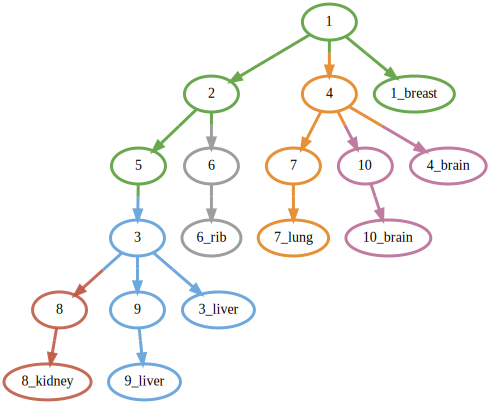

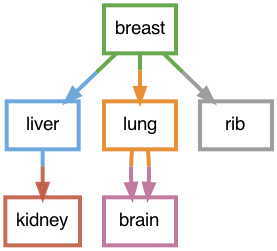

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.924
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

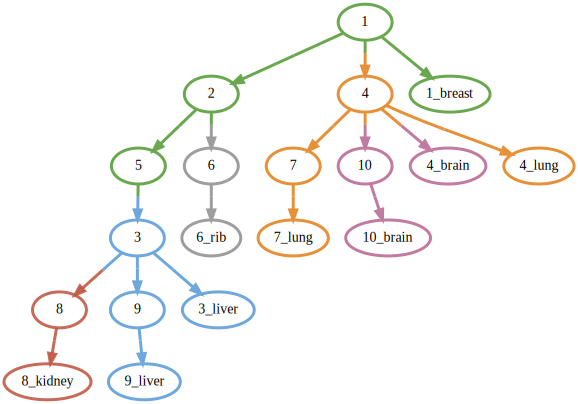

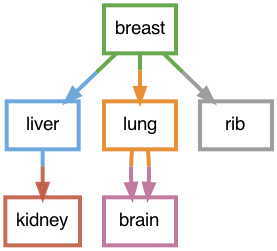

----------------------------------------------------------------------------------------------------



In [16]:
# Patient A7, tree 2 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


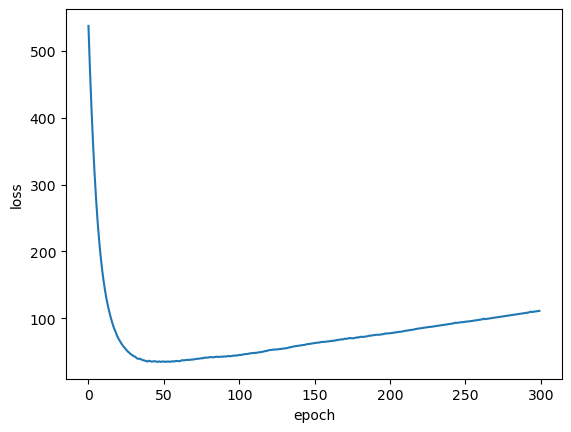

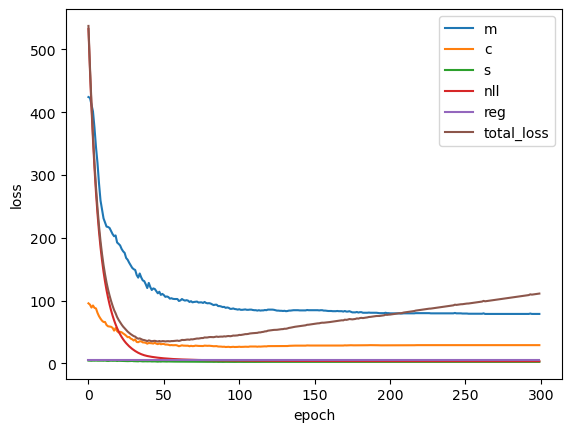

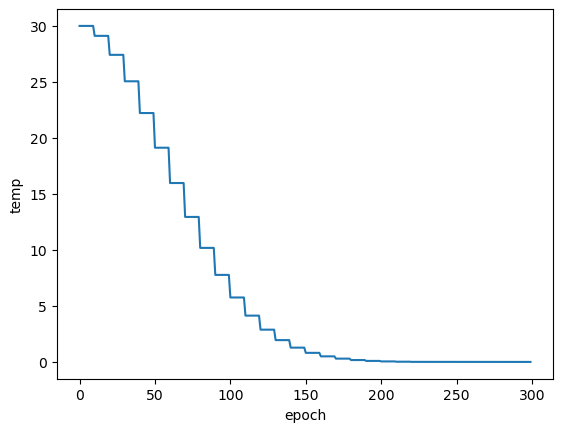

Time elapsed: 14.187985
****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.432
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -

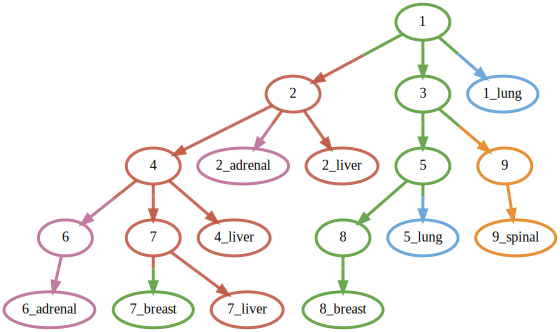

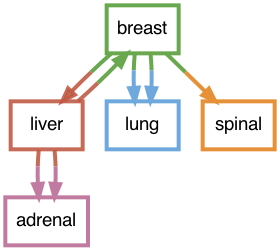

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.454
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -0.0060],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.0000, -0.0336, -0.000

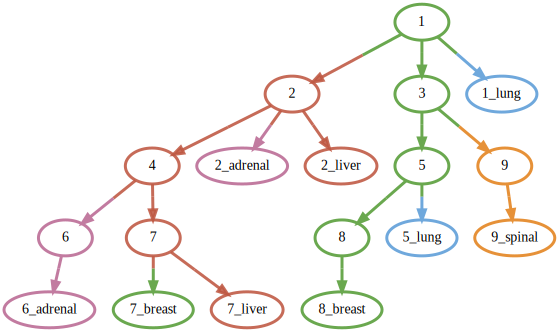

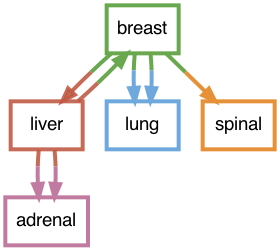

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.463
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

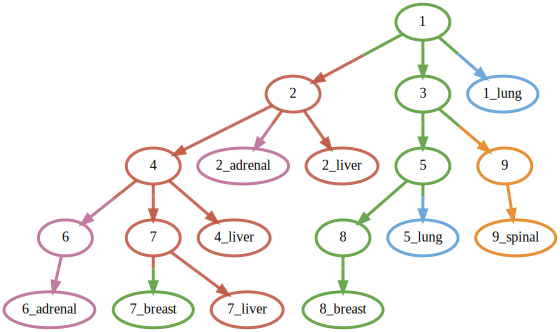

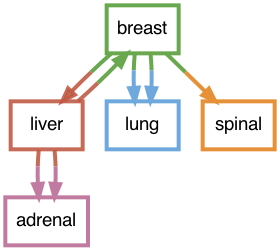

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.483
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

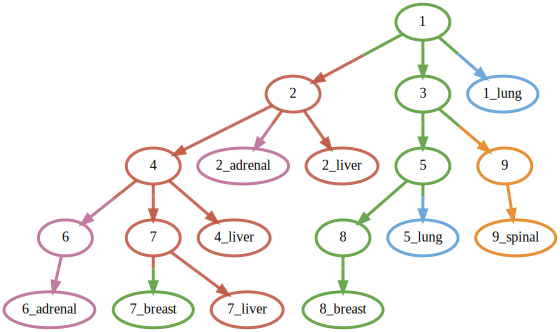

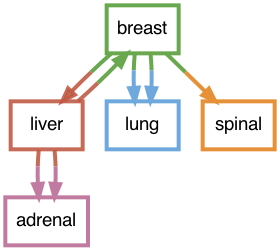

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.498
Reg: 4.999999523162842
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, 

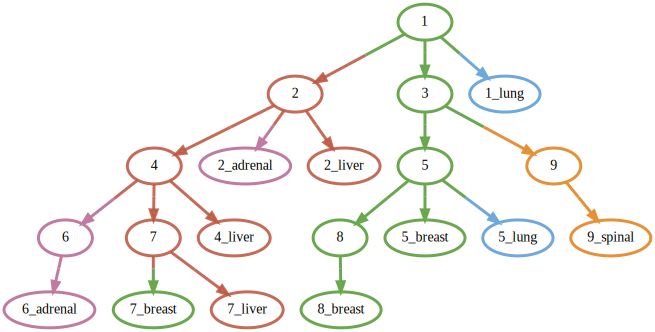

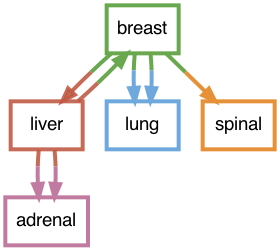

----------------------------------------------------------------------------------------------------



In [17]:
# Patient A1, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


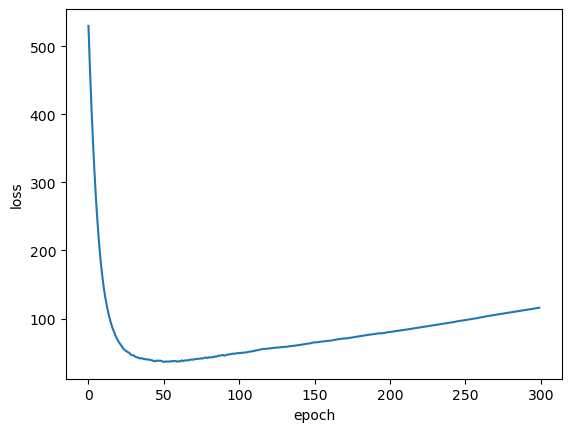

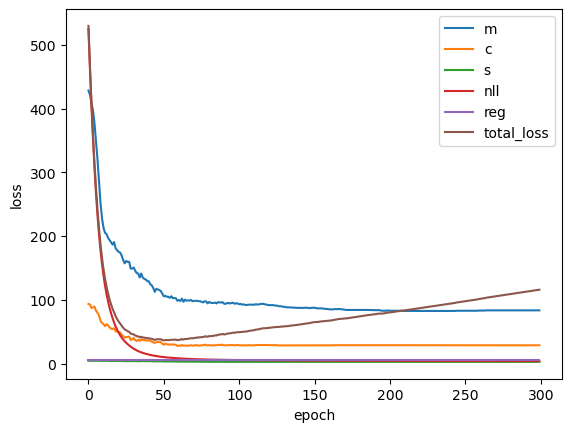

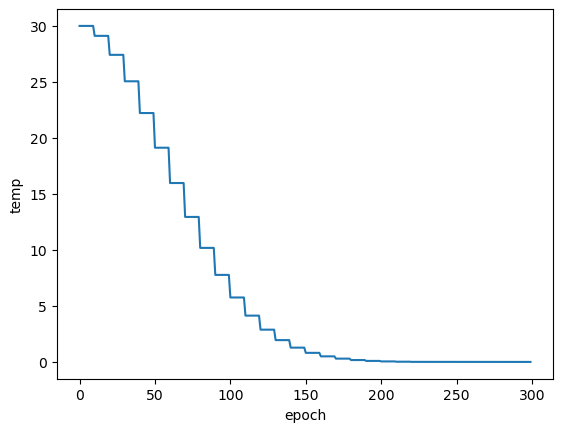

Time elapsed: 14.176712
****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.777
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -

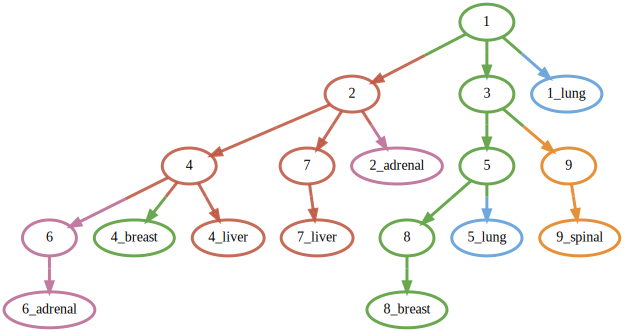

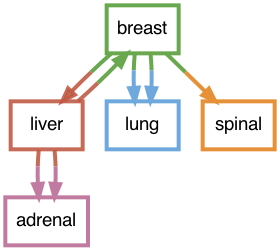

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.902
Reg: 4.999999523162842
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -0.0060],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.0000, -

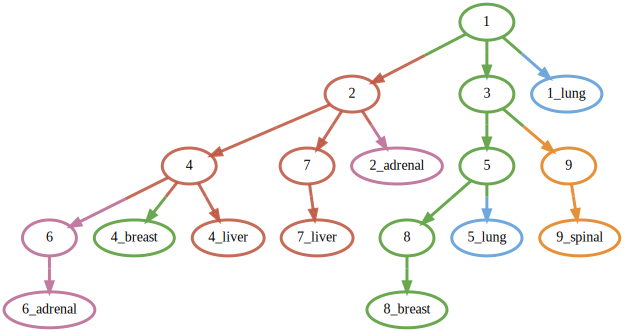

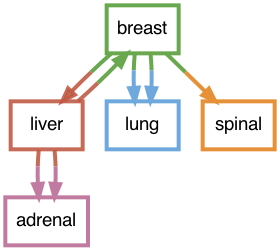

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.081
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

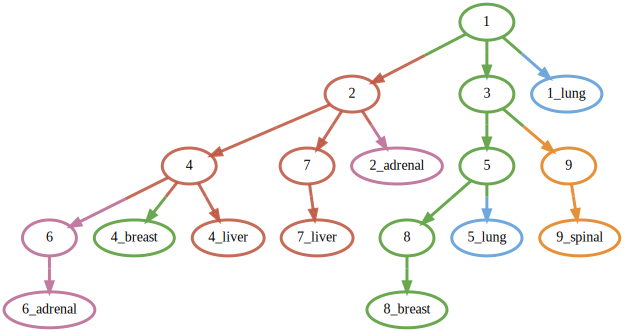

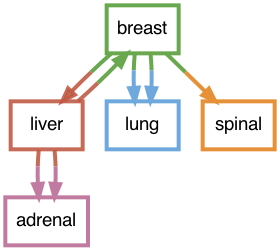

----------------------------------------------------------------------------------------------------

Migration number: 8.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.653
Reg: 5.0
Organotropism penalty: 1.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [2., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

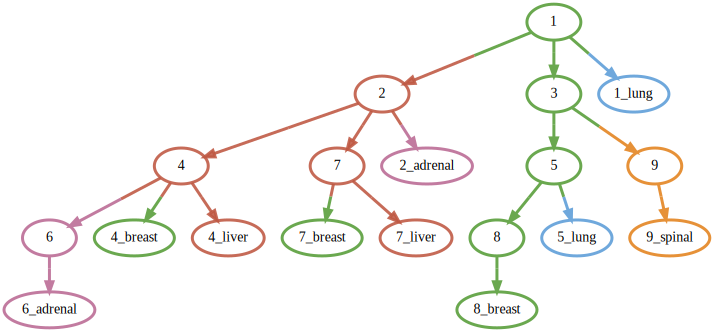

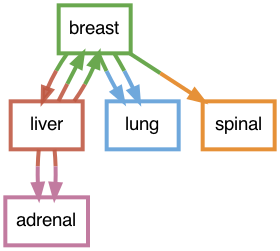

----------------------------------------------------------------------------------------------------

Migration number: 8.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.655
Reg: 5.000000476837158
Organotropism penalty: 1.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [2., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, 

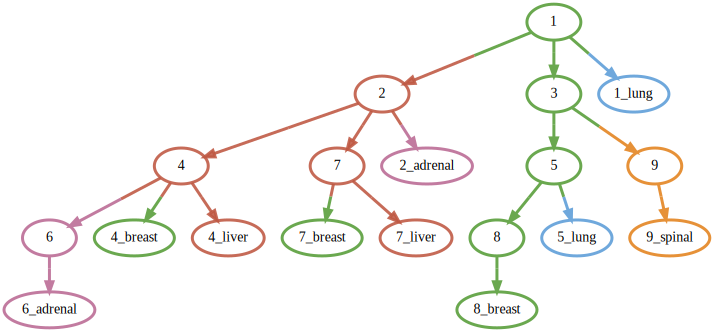

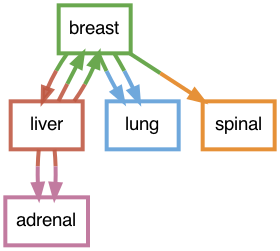

----------------------------------------------------------------------------------------------------



In [18]:
# Patient A1, tree 2 (reported)
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


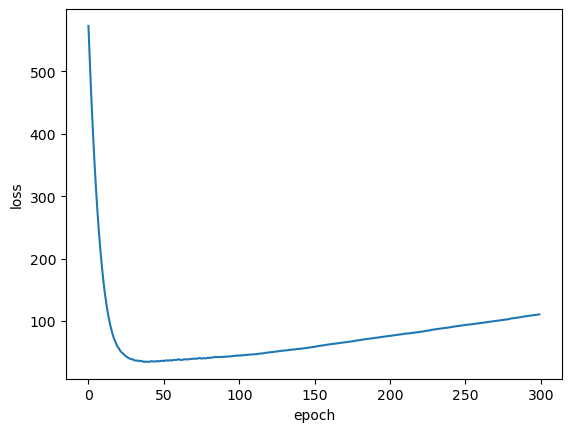

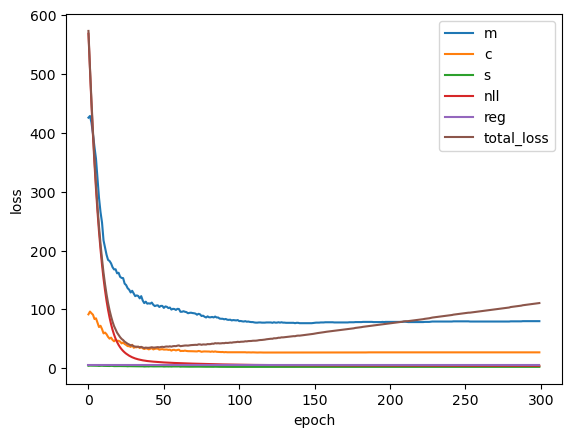

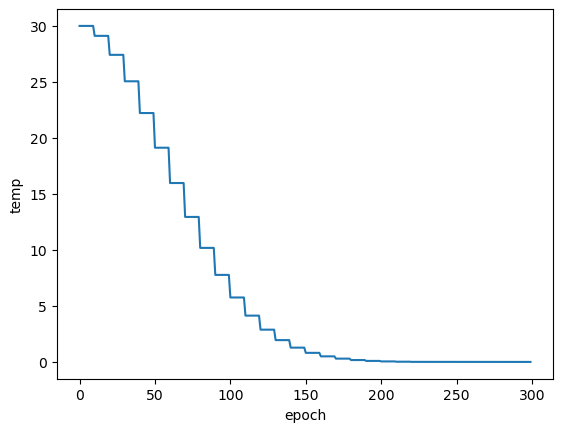

Time elapsed: 14.613158
============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.200    0.192  0.199 0.203   0.206
3   0.195    0.200  0.205 0.200   0.200
4   0.203    0.195  0.207 0.189   0.206
5   0.192    0.211  0.200 0.205   0.192
6   0.202    0.200  0.185 0.213   0.200
7   0.192    0.191  0.199 0.212   0.206
8   0.219    0.196  0.193 0.197   0.195
9   0.237    0.195  0.185 0.188   0.196
Migration number: 44.0
Comigration number: 22.0
Seeding site number: 5.0
Neg log likelihood: 463.983
Reg: 5.0
Organotropism penalty: 21.145
site_adj_no_diag
 tensor([[0., 3., 4., 3., 4.],
        [2., 0., 1., 1., 1.],
        [3., 3., 0., 2., 2.],
        [2., 2., 2., 0., 2.],
        [1., 1., 2., 3., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000,

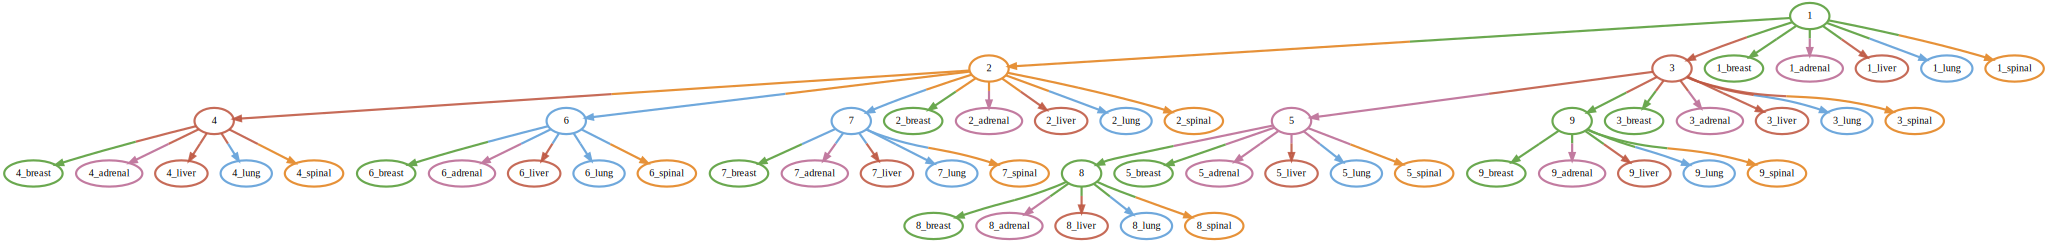

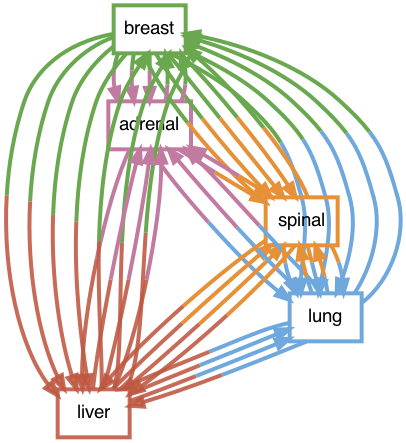

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.211    0.185  0.204 0.209   0.190
3   0.206    0.189  0.201 0.204   0.200
4   0.201    0.202  0.204 0.201   0.192
5   0.218    0.192  0.198 0.201   0.191
6   0.214    0.199  0.196 0.195   0.196
7   0.208    0.188  0.213 0.202   0.190
8   0.211    0.181  0.200 0.193   0.214
9   0.193    0.193  0.196 0.216   0.203
Migration number: 14.0
Comigration number: 7.0
Seeding site number: 4.0
Neg log likelihood: 29.456
Reg: 4.999999523162842
Organotropism penalty: 2.565
site_adj_no_diag
 tensor([[0., 2., 2., 4., 3.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9

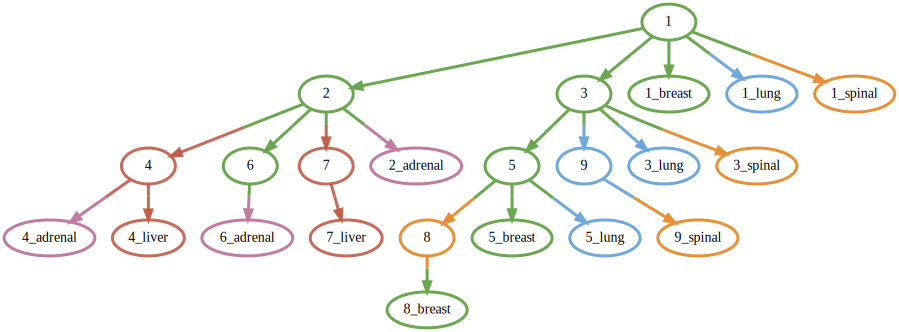

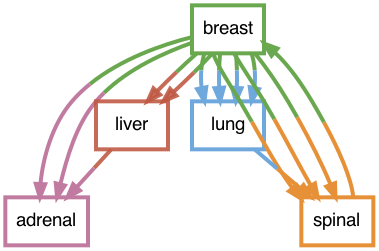

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.228    0.187  0.207 0.194   0.184
3   0.228    0.187  0.180 0.205   0.200
4   0.213    0.223  0.228 0.160   0.176
5   0.267    0.164  0.179 0.202   0.189
6   0.213    0.222  0.200 0.190   0.174
7   0.206    0.175  0.228 0.191   0.200
8   0.240    0.169  0.182 0.203   0.206
9   0.191    0.181  0.197 0.205   0.227
Migration number: 10.0
Comigration number: 6.0
Seeding site number: 2.0
Neg log likelihood: 10.689
Reg: 5.0
Organotropism penalty: 2.728
site_adj_no_diag
 tensor([[0., 2., 2., 2., 2.],
        [0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0

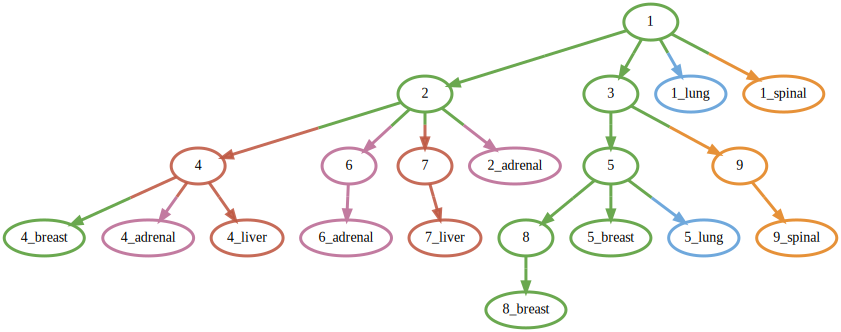

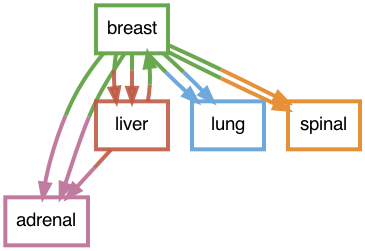

============================== INTERMEDIATE TREE ==============================

Iteration: 60, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.268    0.209  0.226 0.154   0.143
3   0.294    0.144  0.189 0.202   0.172
4   0.220    0.247  0.242 0.147   0.144
5   0.302    0.148  0.168 0.231   0.151
6   0.214    0.302  0.164 0.173   0.148
7   0.237    0.155  0.305 0.153   0.150
8   0.319    0.148  0.176 0.196   0.162
9   0.246    0.145  0.160 0.176   0.273
Migration number: 11.0
Comigration number: 7.0
Seeding site number: 3.0
Neg log likelihood: 7.471
Reg: 5.000000476837158
Organotropism penalty: 5.835
site_adj_no_diag
 tensor([[0., 3., 1., 2., 2.],
        [1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.97

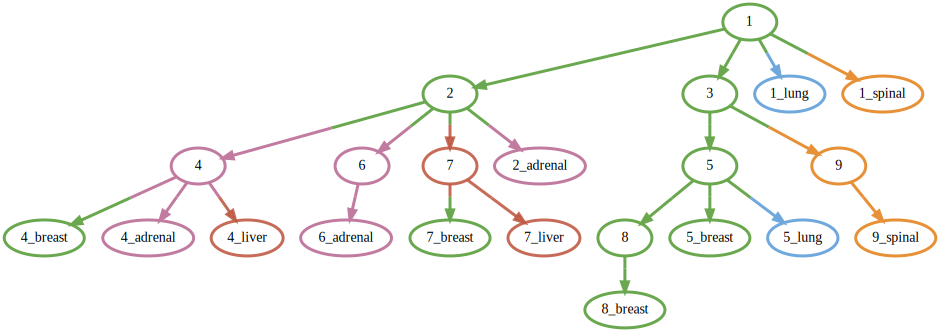

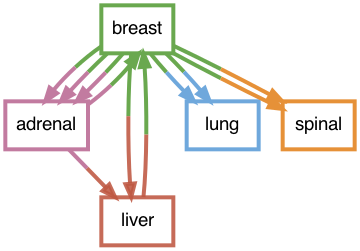

============================== INTERMEDIATE TREE ==============================

Iteration: 80, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.348    0.235  0.231 0.098   0.087
3   0.539    0.095  0.112 0.144   0.109
4   0.312    0.272  0.265 0.081   0.070
5   0.473    0.111  0.118 0.194   0.105
6   0.236    0.451  0.116 0.101   0.097
7   0.211    0.076  0.534 0.086   0.094
8   0.495    0.114  0.115 0.158   0.117
9   0.230    0.094  0.124 0.138   0.414
Migration number: 8.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 6.001
Reg: 5.0
Organotropism penalty: 1.745
site_adj_no_diag
 tensor([[0., 2., 2., 2., 2.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9

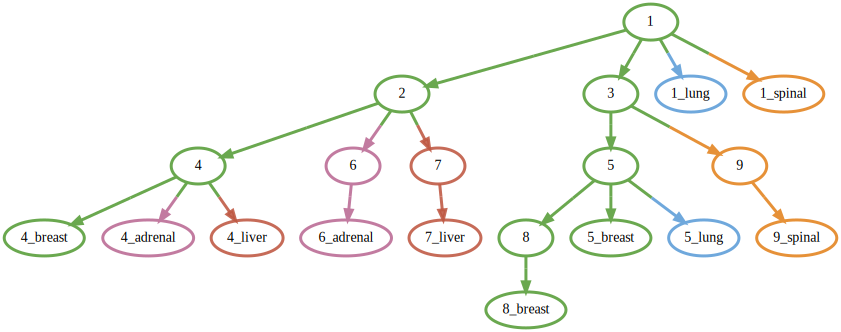

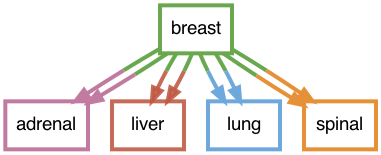

============================== INTERMEDIATE TREE ==============================

Iteration: 100, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.663    0.125  0.154 0.032   0.026
3   0.834    0.026  0.032 0.058   0.050
4   0.625    0.128  0.194 0.023   0.030
5   0.829    0.038  0.030 0.078   0.025
6   0.144    0.764  0.035 0.031   0.027
7   0.124    0.027  0.793 0.023   0.032
8   0.866    0.028  0.033 0.039   0.033
9   0.103    0.027  0.029 0.030   0.811
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 5.43
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9

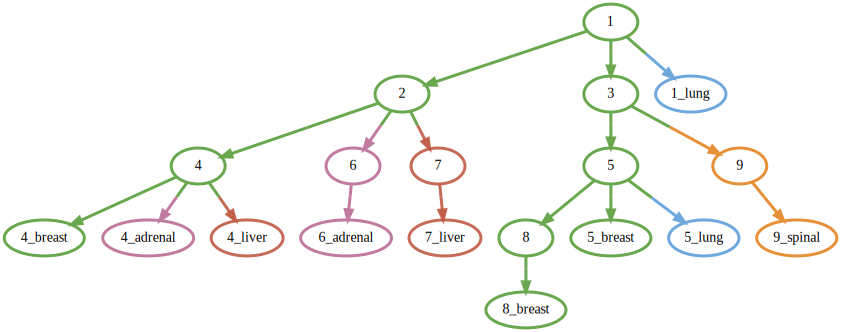

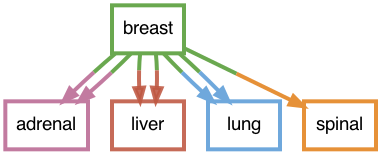

============================== INTERMEDIATE TREE ==============================

Iteration: 120, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   0.985    0.007  0.007 0.001   0.001
3   0.997    0.000  0.001 0.001   0.001
4   0.990    0.003  0.006 0.000   0.000
5   0.996    0.001  0.001 0.002   0.000
6   0.007    0.991  0.001 0.001   0.000
7   0.023    0.001  0.976 0.001   0.001
8   0.997    0.000  0.001 0.001   0.001
9   0.008    0.001  0.001 0.001   0.989
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 5.09
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9

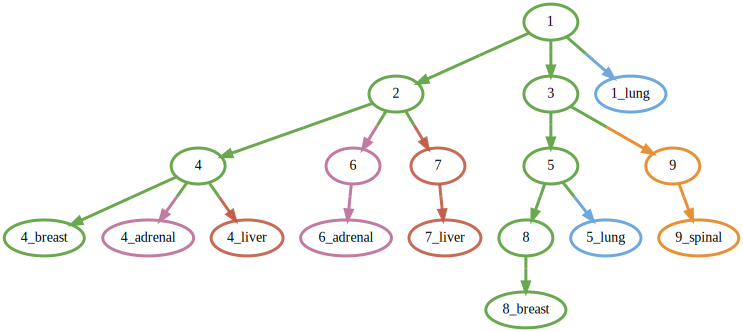

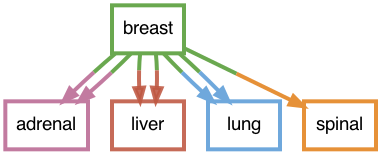

============================== INTERMEDIATE TREE ==============================

Iteration: 140, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.85
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9

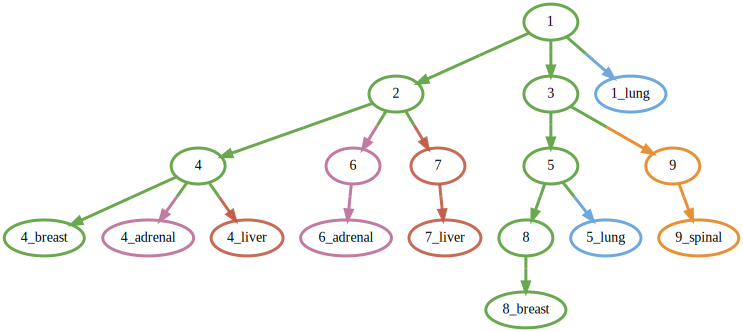

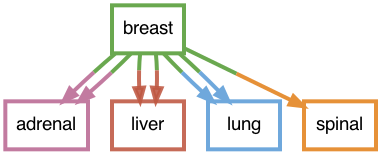

============================== INTERMEDIATE TREE ==============================

Iteration: 160, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.657
Reg: 4.999999523162842
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.97

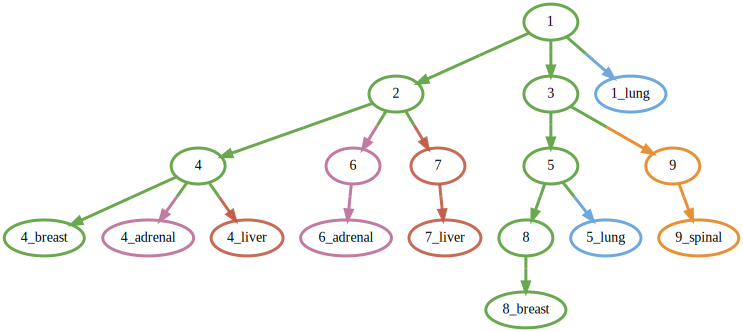

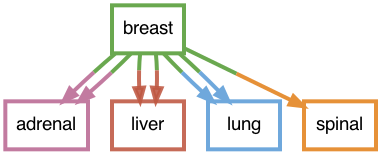

============================== INTERMEDIATE TREE ==============================

Iteration: 180, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.477
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.

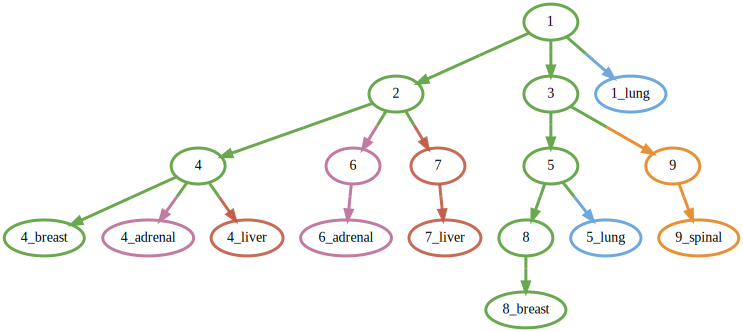

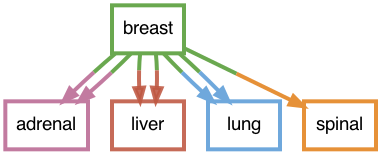

============================== INTERMEDIATE TREE ==============================

Iteration: 200, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.297
Reg: 5.000000476837158
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.97

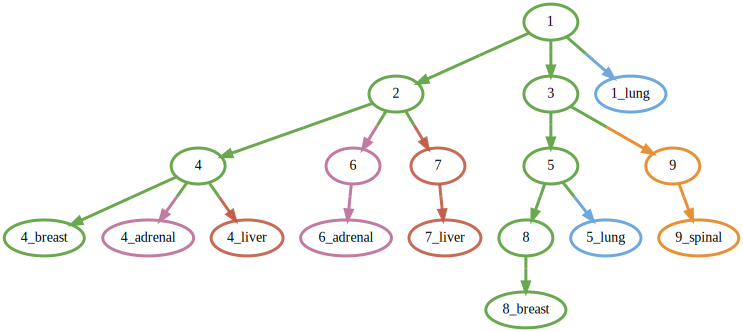

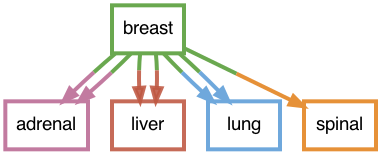

============================== INTERMEDIATE TREE ==============================

Iteration: 220, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.153
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.

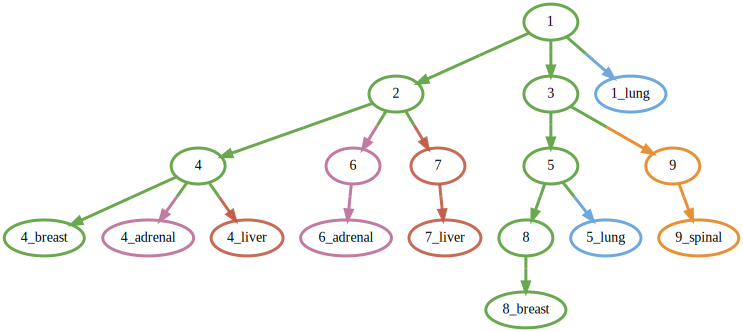

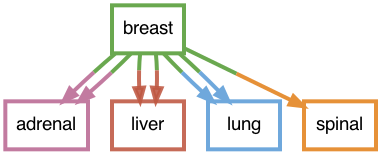

============================== INTERMEDIATE TREE ==============================

Iteration: 240, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.077
Reg: 4.999999523162842
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.97

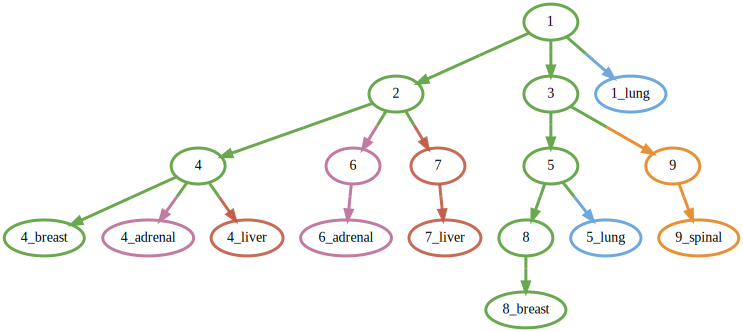

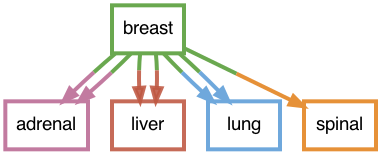

============================== INTERMEDIATE TREE ==============================

Iteration: 260, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.036
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.

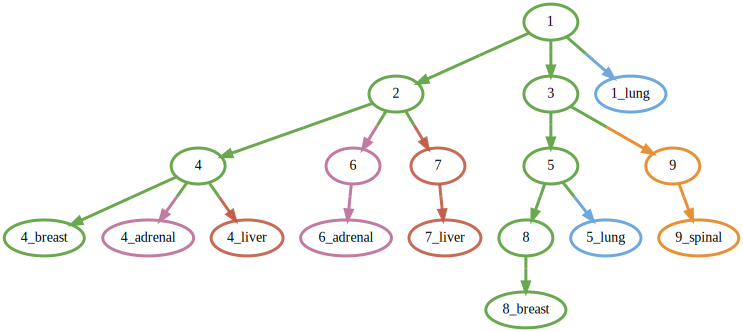

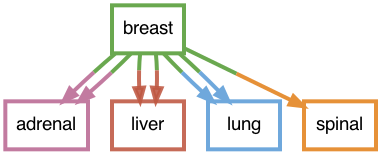

============================== INTERMEDIATE TREE ==============================

Iteration: 280, Intermediate best tree idx 23
soft_X
    breast  adrenal  liver  lung  spinal
2   1.000    0.000  0.000 0.000   0.000
3   1.000    0.000  0.000 0.000   0.000
4   1.000    0.000  0.000 0.000   0.000
5   1.000    0.000  0.000 0.000   0.000
6   0.000    1.000  0.000 0.000   0.000
7   0.000    0.000  1.000 0.000   0.000
8   1.000    0.000  0.000 0.000   0.000
9   0.000    0.000  0.000 0.000   1.000
Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.011
Reg: 5.0
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.

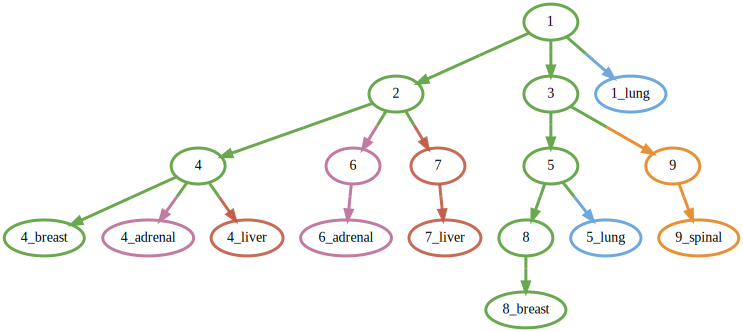

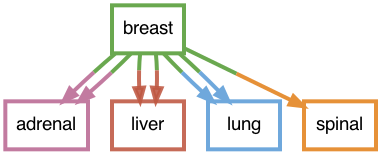

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 98.452
Reg: 4.719581604003906
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  2.0000, -0.1793, -0.0637, -0.0060],


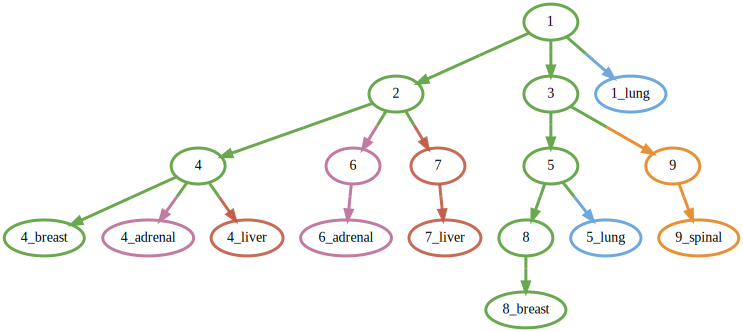

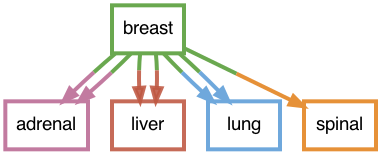

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.257
Reg: 5.000000476837158
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -0.0060],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.0000, -

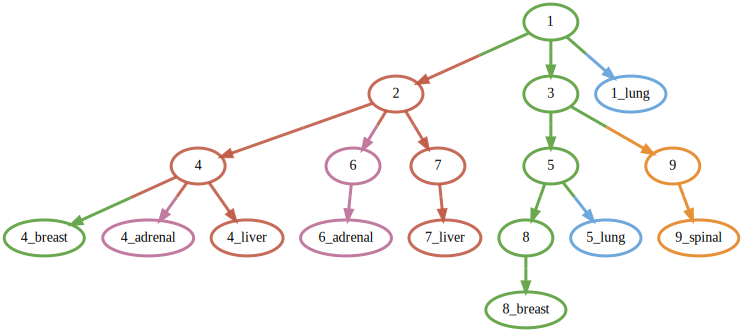

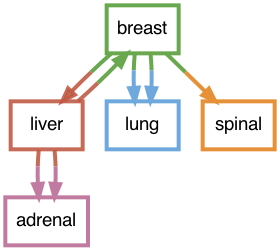

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.386
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

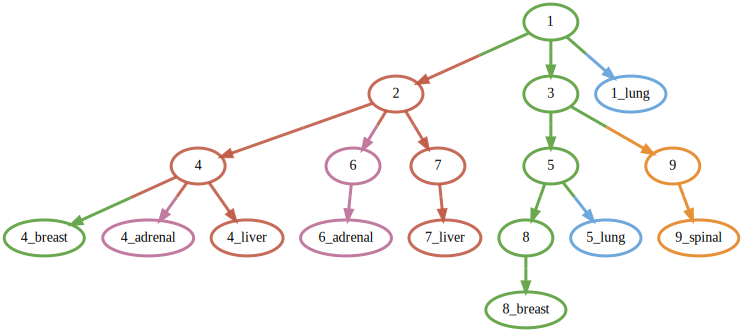

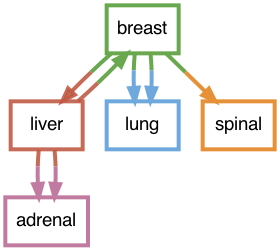

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.439
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

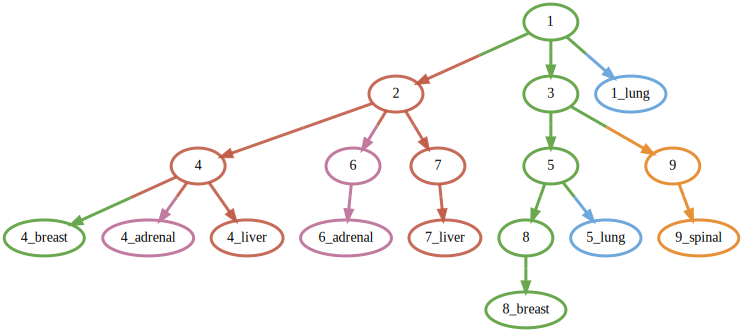

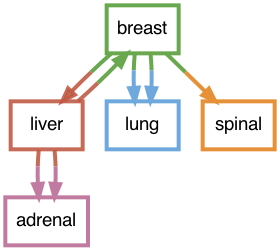

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.089
Reg: 5.0
Organotropism penalty: 3.93
site_adj_no_diag
 tensor([[0., 1., 0., 2., 1.],
        [1., 0., 2., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  1.0000, -0.0000, -0.063

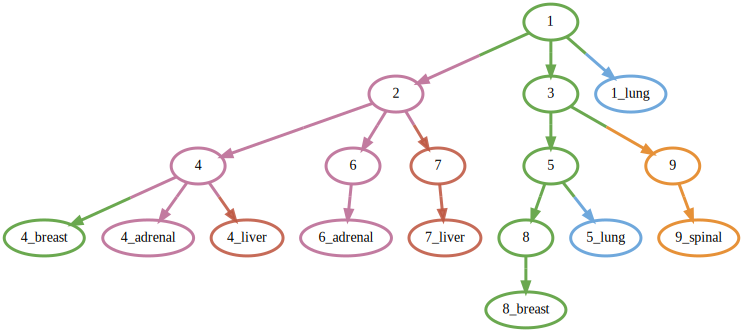

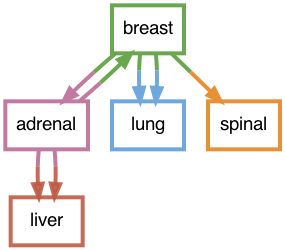

----------------------------------------------------------------------------------------------------



In [5]:
### Patient A1, tree 3 (inferred by SPRUCE)
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.3.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)
